In [1]:
import numpy as np
import scipy.special


class Neural_network():
    def __init__(self, input_nodes, hidden_nodes, output_nodes, lr):
        self.inods= input_nodes
        self.hnods= hidden_nodes
        self.onods= output_nodes
        self.lr= lr
        self.wih= np.random.normal(0.0, pow(self.hnods, -0.5), (self.hnods, self.inods))  #3,3
        self.who= np.random.normal(0.0, pow(self.onods, -0.5), (self.onods, self.hnods))  #3,3
        self.activation_function= lambda x:scipy.special.expit(x)
    
    def train(self, input_list, target_list):
        inputs = np.array(input_list, ndmin=2).T  
        targets = np.array(target_list, ndmin=2).T
    #feed forward
        #calculate signals into hidden layers
        hidden_input= self.wih.dot(inputs)
        hidden_output= self.activation_function(hidden_input)
        #calculate signals into output layers
        final_input= self.who.dot(hidden_output)
        final_output= self.activation_function(final_input)
    #back propagation
        #error
        output_error = targets- final_output
        hidden_error = self.who.T.dot(output_error)
        #updating the weights between output-hidden
        """"
        w = w + lr*Error*sigmoid(output_k_node)*(1- output_k_node).dot(output_j_node)
        """
        self.who += self.lr*(output_error*final_output*(1-final_output)).dot(hidden_output.T)
        self.wih += self.lr*(hidden_error*hidden_output*(1-hidden_output)).dot(inputs.T)
#         self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T    #need 3,1 for this need transpos
        hidden_inputs= self.wih.dot(inputs)
        hidden_output= self.activation_function((hidden_inputs))
        final_inputs= self.who.dot(hidden_output)
        final_outputs= self.activation_function(final_inputs)
        
        return final_outputs 
    
input_nodes= 784
output_nodes= 10
hidden_nodes=100
lr= 0.3
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)
# n.query([1,2,3])


In [2]:
data_file = open('mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

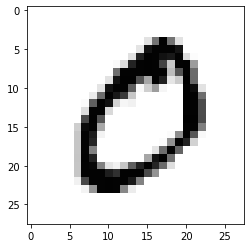

In [4]:
all_values = data_list[1].split(',')
l= int(round(np.sqrt(len(all_values))))
image_array = np.asfarray(all_values[1:]).reshape(l,l)
plt.imshow(image_array, cmap='Greys', interpolation= 'None')

In [5]:
all_array= data_list[11].split(',')
# np.array(all_array[1:]).reshape(28,28) #string element [['0', '0', '0'....]]
im = np.asfarray(all_array[1:]).reshape(28,28) #list element float value, asfarray==> str>> theke float value
# type(np.array(all_array[1:]))


In [54]:
#feaature scaling
scaled_input = (np.asfarray(all_values[1:])/255 *0.99) + 0.01
# scaled_input

In [55]:
#feaature scaling
scaled_input = (im)/255 *0.99 + 0.01
# scaled_input

In [13]:
onodes = 10
targets = np.zeros(onodes)+.01
targets[int(all_values[0])]=0.99
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [63]:
# all_values = data_list[0].split(',')
# int(all_values[0])
all_values= data_list[4].split(',')
# all_values
int(all_values[0])

9

In [67]:
targets= np.zeros(10)
targets[int(all_values[0])]=0.9
targets

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9])

In [30]:
targets= np.zeros(10)+0.01
targets[5]=0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [6]:
input_nodes= 784
output_nodes= 10
hidden_nodes=200
lr= 0.3
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)


In [7]:
for i in data_list:
    all_values = i.split(',')
    inputs = (np.asfarray(np.array(all_values[1:]))/255*0.99)+0.01 # feature scaling
    targets = np.zeros(10) + 0.01 #probable output strucure
    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)  

In [32]:
# for i in data_list:
#     i= i.split(',')
#     break
# targets= np.zeros(10)
# targets[int(i[0])]=1
# targets

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# dealing the test dataset

In [8]:
test_data_file = open('mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [9]:
all_values= test_data_list[0].split(',')
all_values[0]

'7'

## Lets check the pixel value for this output i,e all values of the list except 1st one

In [10]:
import matplotlib.pyplot as plt
import numpy as np

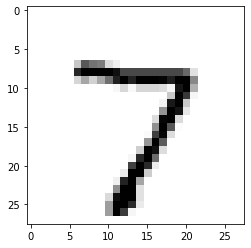

In [11]:
image_array= np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap='Greys')

## Let's check the result form out query method of NN class

In [12]:
input_nodes= 784
output_nodes= 10
hidden_nodes=100
lr= 0.3
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)  #look at the result it shows 1 but should be 7

array([[0.34369555],
       [0.19481292],
       [0.68773237],
       [0.13197404],
       [0.84426715],
       [0.05029113],
       [0.47945646],
       [0.34978447],
       [0.1006004 ],
       [0.948272  ]])

In [13]:
input_nodes= 784
output_nodes= 10
hidden_nodes=100
lr= 0.1
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01) #still no improvement,

array([[0.61420278],
       [0.3346152 ],
       [0.93504072],
       [0.24815523],
       [0.72165185],
       [0.17010588],
       [0.41202251],
       [0.83463069],
       [0.32371323],
       [0.9462231 ]])

## lest increase the hidden units to 150...

In [29]:
input_nodes= 784
output_nodes= 10
hidden_nodes=200
lr= 0.01
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)
r=n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01) #still no improvement,it gives us 4
np.argmax(r)

7

In [18]:
input_nodes= 784
output_nodes= 10
hidden_nodes=200
lr= 0.3
n= Neural_network(input_nodes, hidden_nodes, output_nodes, lr)
predict= n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01) #Yest it is 7
# result = np.argmax(predict)
# result
predict

array([[0.28893695],
       [0.68909298],
       [0.19921843],
       [0.91253689],
       [0.60325762],
       [0.27895933],
       [0.76774403],
       [0.85248849],
       [0.41497778],
       [0.09085659]])

## Lets Check for all the test set

In [31]:
score=[]
for r in test_data_list:
    all_values= r.split(',')
    inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
    corrects = int(r[0])
    print(corrects, 'the actual answer')
    predicts = n.query(inputs)
    label = np.argmax(predicts)
    print(label, "Predicted answer" )
    if (label==corrects):
        score.append(1)
    else:
        score.append(0)
print(score)

7 the actual answer
7 Predicted answer
2 the actual answer
7 Predicted answer
1 the actual answer
7 Predicted answer
0 the actual answer
7 Predicted answer
4 the actual answer
7 Predicted answer
1 the actual answer
7 Predicted answer
4 the actual answer
7 Predicted answer
9 the actual answer
7 Predicted answer
5 the actual answer
5 Predicted answer
9 the actual answer
7 Predicted answer
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [35]:
for r in test_data_list:
    print(int(r[0]))
    break

7
